# Imports

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import glob
import scipy.stats as stats
import scikit_posthocs as sp
import numpy as np

import utils # offload data processing into .py file

In [2]:
data_dir = 'C:/Users/Emily Jensen/OneDrive - UCB-O365/Drone Feedback Data/data/'

# data_dir = '/Users/emilyjensen/Library/CloudStorage/OneDrive-UCB-O365/Drone Feedback Data/data/'

Open all of the relevant data files/directories

Emily downloaded the final data and Qualtrics surveys on 5/17/24

Qualtrics export settings:

<img src="qualtrics_export_settings.png" alt="Qualtrics Export Settings" width="500px">

# Load Data

Notes on participants that seem to have restarted the experiment:
- `5bd49bcc25db7b0001794063` restarted after trial 1 - KEEP
- `5c90094e71f3100016181ea9` restarted after trial 3 and again after trial 1 - KEEP
- `5ef9f528c7ae587afa25fe9b` restarted after trial 6 - REMOVE
- `60fcc292d13ae9614d4a77a7` restarted after trial 3 - KEEP
- `6105c41aa4fe602501d5a8cc` restarted after trial 8 - REMOVE
- `610796f1301fccdca446af57` restarted after trial 7 - REMOVE
- `629658baad2881aba974c6c3` restarted after trial 2 - KEEP
- `63026a8fd8429b224cd2a134` restarted before completing trial 1 - KEEP
- `631f1b608af38f654d2a3b1f` restarted after trial 15 - REMOVE
- `637d4196c70a66e28ecede34` restarted before completing trial 1 - KEEP
- `6388b6c86e47b08e1eded1fd` restarted before completing trial 1 - KEEP
- `63ba10de73415d047e1d6731` restarted after trial 5 and again after trial 1 - REMOVE
- `643c6175d46d41e74033994f` restarted after trial 8 and again after trial 1 - REMOVE
- `652ab7948cb59f4c50c7972a` restarted after trial 1 - KEEP
- `6596a5cad60ef105b6c18897` restarted after trial 1 - KEEP
- `65cba99c92b362b45e414da7` restarted after trial 17 - REMOVE

We will keep the participants who complete less than 5 trials before completing a complete run.

Participant `6400dc9f84ed19aeedc1a2cc` seems to have filled out the qualtrics survey twice. The numerical data are the same and the free response questions have very similar content so I feel fine only keeping the first entry.

This has been implemented in `utils.load_data()`

Participants removed for not providing a good-faith effort:

- `63026a8fd8429b224cd2a134` 
- `637d4196c70a66e28ecede34` 
- `5f90581950d8520e8c7d3890`
- `60706b67613f243aabd7f7bf`

These participants crashed on every trial and never used horizontal inputs

In [3]:
part_file, trial_file, ids = utils.load_data()

Dropped 8 duplicate IDs:
['5bd49bcc25db7b0001794063' '5c90094e71f3100016181ea9'
 '60fcc292d13ae9614d4a77a7' '629658baad2881aba974c6c3'
 '6388b6c86e47b08e1eded1fd' '6400dc9f84ed19aeedc1a2cc'
 '652ab7948cb59f4c50c7972a' '6596a5cad60ef105b6c18897']
Final number of IDs in participant file: 167
Final number of IDs in trial file: 167


# Basic stats

This is after filtering out participants that restarted the experiment

In [4]:
utils.run_basic_stats(part_file)

           count  proportion
condition                   
demo           0        0.00
full          56        0.34
score         55        0.33
text          56        0.34
            count  proportion
gender                       
Man            73        0.44
Non-binary      7        0.04
Woman          87        0.52
                  count  proportion
drone_experience                   
None                136        0.81
Some                 26        0.16
Regularly             5        0.03
Professional          0        0.00
                       count  proportion
video_game_experience                   
None                      30        0.18
Monthly                   46        0.28
Weekly                    40        0.24
Daily                     51        0.31
                   count  proportion
feedback_helped                     
Strongly Disagree     23        0.14
Disagree              22        0.13
Neutral               26        0.16
Agree                 71     

# Research Themes

In [17]:
table = part_file.groupby(['condition', 'mode_actionable_collapsed']).size().unstack()
table = table.drop('demo')
table = table.div(table.sum(axis=1), axis=0)
order_of_conditions = ['score', 'text', 'full']  # Replace with your actual condition names
table = table.loc[order_of_conditions]

order_of_survey_responses = ['Disagree', 'Neutral', 'Agree']
table = table[order_of_survey_responses]

table

mode_actionable_collapsed,Disagree,Neutral,Agree
condition,,,
score,0.381818,0.272727,0.345455
text,0.160714,0.142857,0.696429
full,0.125000,0.214286,0.660714


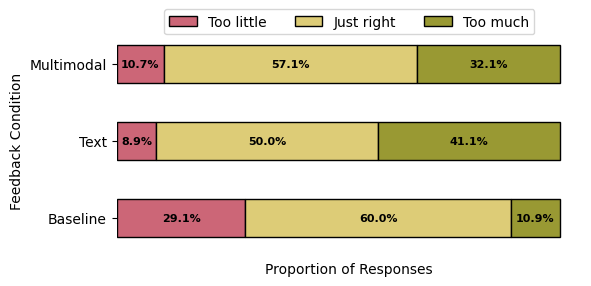

In [53]:
custom_colors = ['#CC6677', '#DDCC77', '#999933']
ax = table.plot(kind='barh', stacked=True, color=custom_colors, edgecolor='black', figsize=(6,3))

custom_y_labels = ['Baseline', 'Text', 'Multimodal']
ax.set_yticklabels(custom_y_labels)

plt.xlabel('Proportion of Responses')
plt.ylabel('Feedback Condition')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1), ncol=3)
plt.xticks(rotation=0)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.set_xticks([])

for i in range(len(table)):
    cumulative_sum=0
    for j in range(len(order_of_survey_responses)):
        percentage = table.iloc[i, j]
        if percentage > 0:  # Add text only for non-zero proportions
            #print(f"{order_of_conditions[i]} {order_of_survey_responses[j]}: {percentage:.1f}")
            ax.text(cumulative_sum + (percentage / 2), i, f'{percentage*100:.1f}%', va='center', 
                    ha='center', color='black', fontsize=8, fontweight='bold')
        cumulative_sum += percentage

plt.show()

In [47]:
table = part_file.groupby(['condition', 'mode_manageable_collapsed']).size().unstack()
table = table.drop('demo')
table = table.div(table.sum(axis=1), axis=0)
order_of_conditions = ['score', 'text', 'full']  # Replace with your actual condition names
table = table.loc[order_of_conditions]

order_of_survey_responses = ['Too little', 'Just right', 'Too much']
table = table[order_of_survey_responses]

table

mode_manageable_collapsed,Too little,Just right,Too much
condition,,,
score,0.290909,0.600000,0.109091
text,0.089286,0.500000,0.410714
full,0.107143,0.571429,0.321429


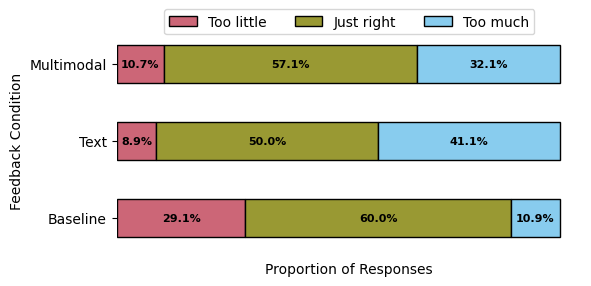

In [52]:
custom_colors = ['#CC6677', '#999933', '#88CCEE']
ax = table.plot(kind='barh', stacked=True, color=custom_colors, edgecolor='black', figsize=(6,3))

custom_y_labels = ['Baseline', 'Text', 'Multimodal']
ax.set_yticklabels(custom_y_labels)

plt.xlabel('Proportion of Responses')
plt.ylabel('Feedback Condition')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1), ncol=3)
plt.xticks(rotation=0)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.set_xticks([])

for i in range(len(table)):
    cumulative_sum=0
    for j in range(len(order_of_survey_responses)):
        percentage = table.iloc[i, j]
        if percentage > 0:  # Add text only for non-zero proportions
            #print(f"{order_of_conditions[i]} {order_of_survey_responses[j]}: {percentage:.1f}")
            ax.text(cumulative_sum + (percentage / 2), i, f'{percentage*100:.1f}%', va='center', 
                    ha='center', color='black', fontsize=8, fontweight='bold')
        cumulative_sum += percentage

plt.show()

## Perception of Feedback

### What is associated with overall feedback helpfulness rating?

In [5]:
ind_vars = ['age', 'drone_experience_code', 
            'video_game_experience_code', 'total_time_seconds', 
            'avg_feedback_time_seconds','avg_trial_time_seconds', 
            'gender_Non-binary', 'gender_Woman', 
            'n_safe_landings'] + [f'mode_{q}_code' for q in ['motivation_collapsed', 'manageable_collapsed', 'actionable_collapsed', 'timely_collapsed', 'reflection_collapsed']]

dep_var = 'feedback_helped_collapsed'

utils.run_ordered_model(dep_var, ind_vars, part_file)

Optimization terminated successfully.
         Current function value: 0.719001
         Iterations: 67
         Function evaluations: 74
         Gradient evaluations: 74
                                 OrderedModel Results                                
Dep. Variable:     feedback_helped_collapsed   Log-Likelihood:                -120.07
Model:                          OrderedModel   AIC:                             272.1
Method:                   Maximum Likelihood   BIC:                             322.0
Date:                       Sat, 18 May 2024                                         
Time:                               19:28:49                                         
No. Observations:                        167                                         
Df Residuals:                            151                                         
Df Model:                                 14                                         
                                     coef    std err  

### What is associated with overall rating for each dimension?

In [6]:
ind_vars = ['age', 'drone_experience_code', 
            'video_game_experience_code', 'total_time_seconds', 
            'avg_feedback_time_seconds','avg_trial_time_seconds', 
            'gender_Non-binary', 'gender_Woman', 
            'n_safe_landings']

dep_var = 'mode_motivation_collapsed_code'

utils.run_ordered_model(dep_var, ind_vars, part_file)

Optimization terminated successfully.
         Current function value: 0.894534
         Iterations: 41
         Function evaluations: 49
         Gradient evaluations: 49
                                   OrderedModel Results                                   
Dep. Variable:     mode_motivation_collapsed_code   Log-Likelihood:                -149.39
Model:                               OrderedModel   AIC:                             320.8
Method:                        Maximum Likelihood   BIC:                             355.1
Date:                            Sat, 18 May 2024                                         
Time:                                    19:30:45                                         
No. Observations:                             167                                         
Df Residuals:                                 156                                         
Df Model:                                       9                                         
         

In [7]:
ind_vars = ['age', 'drone_experience_code', 
            'video_game_experience_code', 'total_time_seconds', 
            'avg_feedback_time_seconds','avg_trial_time_seconds', 
            'gender_Non-binary', 'gender_Woman', 
            'n_safe_landings']

dep_var = 'mode_manageable_collapsed_code'

utils.run_ordered_model(dep_var, ind_vars, part_file)

Optimization terminated successfully.
         Current function value: 0.948278
         Iterations: 39
         Function evaluations: 44
         Gradient evaluations: 44
                                   OrderedModel Results                                   
Dep. Variable:     mode_manageable_collapsed_code   Log-Likelihood:                -158.36
Model:                               OrderedModel   AIC:                             338.7
Method:                        Maximum Likelihood   BIC:                             373.0
Date:                            Sat, 18 May 2024                                         
Time:                                    19:31:11                                         
No. Observations:                             167                                         
Df Residuals:                                 156                                         
Df Model:                                       9                                         
         

In [8]:
ind_vars = ['age', 'drone_experience_code', 
            'video_game_experience_code', 'total_time_seconds', 
            'avg_feedback_time_seconds','avg_trial_time_seconds', 
            'gender_Non-binary', 'gender_Woman', 
            'n_safe_landings']

dep_var = 'mode_timely_collapsed_code'

utils.run_ordered_model(dep_var, ind_vars, part_file)

Optimization terminated successfully.
         Current function value: 0.708858
         Iterations: 42
         Function evaluations: 47
         Gradient evaluations: 47
                                 OrderedModel Results                                 
Dep. Variable:     mode_timely_collapsed_code   Log-Likelihood:                -118.38
Model:                           OrderedModel   AIC:                             258.8
Method:                    Maximum Likelihood   BIC:                             293.1
Date:                        Sat, 18 May 2024                                         
Time:                                19:31:48                                         
No. Observations:                         167                                         
Df Residuals:                             156                                         
Df Model:                                   9                                         
                                 coef    std 

In [9]:
ind_vars = ['age', 'drone_experience_code', 
            'video_game_experience_code', 'total_time_seconds', 
            'avg_feedback_time_seconds','avg_trial_time_seconds', 
            'gender_Non-binary', 'gender_Woman', 
            'n_safe_landings']

dep_var = 'mode_reflection_collapsed_code'

utils.run_ordered_model(dep_var, ind_vars, part_file)

Optimization terminated successfully.
         Current function value: 0.780575
         Iterations: 45
         Function evaluations: 54
         Gradient evaluations: 54
                                   OrderedModel Results                                   
Dep. Variable:     mode_reflection_collapsed_code   Log-Likelihood:                -130.36
Model:                               OrderedModel   AIC:                             282.7
Method:                        Maximum Likelihood   BIC:                             317.0
Date:                            Sat, 18 May 2024                                         
Time:                                    19:32:28                                         
No. Observations:                             167                                         
Df Residuals:                                 156                                         
Df Model:                                       9                                         
         

In [10]:
ind_vars = ['age', 'drone_experience_code', 
            'video_game_experience_code', 'total_time_seconds', 
            'avg_feedback_time_seconds','avg_trial_time_seconds', 
            'gender_Non-binary', 'gender_Woman', 
            'n_safe_landings']

dep_var = 'mode_actionable_collapsed_code'

utils.run_ordered_model(dep_var, ind_vars, part_file)

Optimization terminated successfully.
         Current function value: 0.956640
         Iterations: 39
         Function evaluations: 48
         Gradient evaluations: 48
                                   OrderedModel Results                                   
Dep. Variable:     mode_actionable_collapsed_code   Log-Likelihood:                -159.76
Model:                               OrderedModel   AIC:                             341.5
Method:                        Maximum Likelihood   BIC:                             375.8
Date:                            Sat, 18 May 2024                                         
Time:                                    19:33:14                                         
No. Observations:                             167                                         
Df Residuals:                                 156                                         
Df Model:                                       9                                         
         

### What is associated with trial rating for each dimension?

In [11]:
ind_vars = ['trial_time_seconds', 'feedback_time_seconds', 
            'trial', 'outcome_code']

dep_var = 'motivation_collapsed'

utils.run_ordered_model(dep_var, ind_vars, trial_file)

Optimization terminated successfully.
         Current function value: 0.965110
         Iterations: 18
         Function evaluations: 21
         Gradient evaluations: 21
                              OrderedModel Results                              
Dep. Variable:     motivation_collapsed   Log-Likelihood:                -3158.8
Model:                     OrderedModel   AIC:                             6330.
Method:              Maximum Likelihood   BIC:                             6366.
Date:                  Sat, 18 May 2024                                         
Time:                          19:33:43                                         
No. Observations:                  3273                                         
Df Residuals:                      3267                                         
Df Model:                             4                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
---------

In [12]:
ind_vars = ['trial_time_seconds', 'feedback_time_seconds', 
            'trial', 'outcome_code',]

dep_var = 'manageable_collapsed'

utils.run_ordered_model(dep_var, ind_vars, trial_file)

Optimization terminated successfully.
         Current function value: 0.988160
         Iterations: 15
         Function evaluations: 20
         Gradient evaluations: 20
                              OrderedModel Results                              
Dep. Variable:     manageable_collapsed   Log-Likelihood:                -3234.2
Model:                     OrderedModel   AIC:                             6480.
Method:              Maximum Likelihood   BIC:                             6517.
Date:                  Sat, 18 May 2024                                         
Time:                          19:34:28                                         
No. Observations:                  3273                                         
Df Residuals:                      3267                                         
Df Model:                             4                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
---------

In [13]:
ind_vars = ['trial_time_seconds', 'feedback_time_seconds', 
            'trial', 'outcome_code']

dep_var = 'timely_collapsed'

utils.run_ordered_model(dep_var, ind_vars, trial_file)

Optimization terminated successfully.
         Current function value: 0.792971
         Iterations: 19
         Function evaluations: 22
         Gradient evaluations: 22
                             OrderedModel Results                             
Dep. Variable:       timely_collapsed   Log-Likelihood:                -2595.4
Model:                   OrderedModel   AIC:                             5203.
Method:            Maximum Likelihood   BIC:                             5239.
Date:                Sat, 18 May 2024                                         
Time:                        19:34:57                                         
No. Observations:                3273                                         
Df Residuals:                    3267                                         
Df Model:                           4                                         
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------

In [14]:
ind_vars = ['trial_time_seconds', 'feedback_time_seconds', 
            'trial', 'outcome_code']

dep_var = 'reflection_collapsed'

utils.run_ordered_model(dep_var, ind_vars, trial_file)

Optimization terminated successfully.
         Current function value: 0.927775
         Iterations: 18
         Function evaluations: 22
         Gradient evaluations: 22
                              OrderedModel Results                              
Dep. Variable:     reflection_collapsed   Log-Likelihood:                -3036.6
Model:                     OrderedModel   AIC:                             6085.
Method:              Maximum Likelihood   BIC:                             6122.
Date:                  Sat, 18 May 2024                                         
Time:                          19:35:43                                         
No. Observations:                  3273                                         
Df Residuals:                      3267                                         
Df Model:                             4                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
---------

In [15]:
ind_vars = ['trial_time_seconds', 'feedback_time_seconds', 
            'trial', 'outcome_code']

dep_var = 'actionable_collapsed'

utils.run_ordered_model(dep_var, ind_vars, trial_file)

Optimization terminated successfully.
         Current function value: 1.004104
         Iterations: 20
         Function evaluations: 23
         Gradient evaluations: 23
                              OrderedModel Results                              
Dep. Variable:     actionable_collapsed   Log-Likelihood:                -3286.4
Model:                     OrderedModel   AIC:                             6585.
Method:              Maximum Likelihood   BIC:                             6621.
Date:                  Sat, 18 May 2024                                         
Time:                          19:36:28                                         
No. Observations:                  3273                                         
Df Residuals:                      3267                                         
Df Model:                             4                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
---------

### Distributions of dimensional ratings across groups

In [ ]:
utils.run_kruskal('mode_motivation_collapsed_code', part_file)

In [ ]:
utils.run_kruskal('mode_manageable_collapsed_code', part_file)

In [ ]:
utils.run_kruskal('mode_actionable_collapsed_code', part_file)

In [ ]:
utils.run_kruskal('mode_timely_collapsed_code', part_file)

In [ ]:
utils.run_kruskal('mode_reflection_collapsed_code', part_file)

### Did they think the feedback helped?

In [ ]:
utils.run_kruskal('feedback_helped_collapsed_code', part_file)

## Evolution of Performance

For each condition, plot out the success of the trial for each participant

skipping participant 6522a86994a5ce0d7bb9feba trial 9


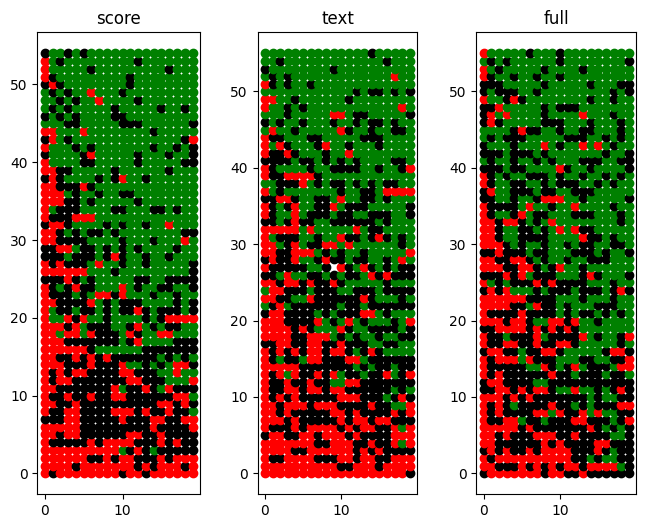

In [52]:
fig, axs = plt.subplots(1,3, figsize=(8,6))
n_trials = 20

conditions = list(ids.keys())

# for each condition
for a in range(len(axs)):
    overall_scores = []

    # for each participant in that condition
    for i in range(len(ids[conditions[a]])):
        part = ids[conditions[a]].iloc[i]
        data = pd.read_csv(data_dir + part + '/survey_responses.csv')

        # score for that participant
        data['outcome_sore'] = 0
        data.loc[data['outcome'] == 'Unsafe', 'outcome_score'] = 3
        data.loc[data['outcome'] == 'Crash', 'outcome_score'] = 5

        total_score = data['outcome_score'].sum()
        overall_scores.append((i, part, total_score))

    # sort participants for this condition
    sorted_participants = sorted(overall_scores, key=lambda x: x[2], reverse=True)

    # plot all participants in sorted order
    for sorted_index, (_, part, _) in enumerate(sorted_participants):
        data = pd.read_csv(data_dir + part + '/survey_responses.csv')

        # plot all trials for that participant
        for trial in range(n_trials):
            try:
                outcome = data[data['trial'] == trial+1]['outcome'].values[0]
                if outcome == 'Safe':
                    axs[a].plot(trial, sorted_index, 'go')
                elif outcome == 'Unsafe':
                    axs[a].plot(trial, sorted_index, 'ko')
                else:
                    axs[a].plot(trial, sorted_index, 'ro')
            except:
                print(f"skipping participant {part} trial {trial}")

    axs[a].set_aspect('equal')
    axs[a].set_title(f'{conditions[a]}')

plt.show()

skipping participant 6522a86994a5ce0d7bb9feba trial 9


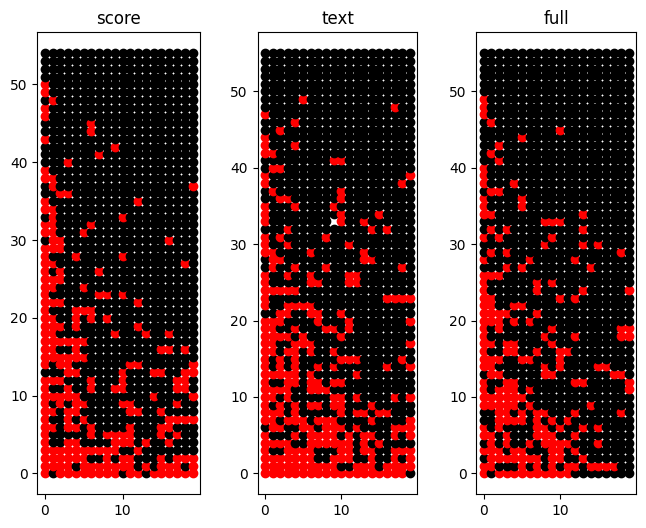

In [53]:
fig, axs = plt.subplots(1,3, figsize=(8,6))
n_trials = 20

conditions = list(ids.keys())

# for each condition
for a in range(len(axs)):
    overall_scores = []

    # for each participant in that condition
    for i in range(len(ids[conditions[a]])):
        part = ids[conditions[a]].iloc[i]
        data = pd.read_csv(data_dir + part + '/survey_responses.csv')

        # score for that participant
        data['outcome_sore'] = 0
        data.loc[data['outcome'] == 'Crash', 'outcome_score'] = 3

        total_score = data['outcome_score'].sum()
        overall_scores.append((i, part, total_score))

    # sort participants for this condition
    sorted_participants = sorted(overall_scores, key=lambda x: x[2], reverse=True)

    # plot all participants in sorted order
    for sorted_index, (_, part, _) in enumerate(sorted_participants):
        data = pd.read_csv(data_dir + part + '/survey_responses.csv')

        # plot all trials for that participant
        for trial in range(n_trials):
            try:
                outcome = data[data['trial'] == trial+1]['outcome'].values[0]
                if outcome == 'Safe' or outcome == 'Unsafe':
                    axs[a].plot(trial, sorted_index, 'ko')
                else:
                    axs[a].plot(trial, sorted_index, 'ro')
            except:
                print(f"skipping participant {part} trial {trial}")

    axs[a].set_aspect('equal')
    axs[a].set_title(f'{conditions[a]}')

plt.show()

### Recent stuff I haven't organized yet

In [54]:
# calculate if each participant got a safe landing within the first 5 trials
part_file['safe_in_first_5'] = False
part_file['land_in_first_5'] = False
part_file['safe_last_5'] = 0
part_file['unsafe_last_5'] = 0
part_file['land_last_5'] = 0
part_file['crash_last_5'] = 0

for part in part_file['prolific_id']:
    data = pd.read_csv(data_dir + part + '/survey_responses.csv')
    first_five = data[data['trial'] <= 5]
    last_five = data[data['trial'] >= 16]

    n_safe = (first_five['outcome'] == 'Safe').sum()
    if n_safe > 0:
        part_file.loc[part_file['prolific_id'] == part, 'safe_in_first_5'] = True
    n_land = (first_five['outcome'].isin(['Safe', 'Unsafe'])).sum()
    if n_land > 0:
        part_file.loc[part_file['prolific_id'] == part, 'land_in_first_5'] = True

    n_safe = (last_five['outcome'] == 'Safe').sum()
    n_unsafe = (last_five['outcome'] == 'Unsafe').sum()
    n_crash = (last_five['outcome'] == 'Crash').sum()
    n_land = n_safe + n_unsafe
    part_file.loc[part_file['prolific_id'] == part, 'safe_last_5'] = n_safe
    part_file.loc[part_file['prolific_id'] == part, 'unsafe_last_5'] = n_unsafe
    part_file.loc[part_file['prolific_id'] == part, 'land_last_5'] = n_land
    part_file.loc[part_file['prolific_id'] == part, 'crash_last_5'] = n_crash

In [55]:
struggle_land_ids = part_file[part_file['land_in_first_5'] == False]['prolific_id']
struggle_safe_ids = part_file[part_file['safe_in_first_5'] == False]['prolific_id']

In [56]:
part_file.groupby('condition')['safe_in_first_5'].value_counts().unstack()

safe_in_first_5,False,True
condition,,
demo,0,0
full,28,28
score,27,28
text,28,28


In [57]:
part_file['n_landings'] = part_file['n_safe_landings'] + part_file['n_unsafe_landings']
part_file['any_landings'] = part_file['n_landings'] > 0

In [58]:
part_file.groupby('condition')['land_in_first_5'].value_counts().unstack()

land_in_first_5,False,True
condition,,
demo,0,0
full,2,54
score,5,50
text,5,51


In [59]:
part_file[part_file['prolific_id'].isin(struggle_safe_ids)].groupby('condition')['unsafe_last_5'].agg(['mean', 'std'])

,mean,std
condition,,
demo,NaN,NaN
full,2.214286,1.227981
score,1.962963,1.556166
text,2.000000,1.333333


In [60]:
stats.ttest_ind(part_file.loc[(part_file['prolific_id'].isin(struggle_safe_ids)) & (part_file['condition'] == 'full'), 'n_crashes'],
part_file.loc[(part_file['prolific_id'].isin(struggle_safe_ids)) & (part_file['condition'] == 'score'), 'n_crashes'])

TtestResult(statistic=-0.8870253332415172, pvalue=0.37907279878923783, df=53.0)

In [61]:
stats.ttest_ind(part_file.loc[(part_file['prolific_id'].isin(struggle_safe_ids)) & (part_file['condition'] == 'full'), 'crash_last_5'],
part_file.loc[(part_file['prolific_id'].isin(struggle_safe_ids)) & (part_file['condition'] == 'score'), 'crash_last_5'])

# difference between number of crashes in last 5 trials between score and full conditions

TtestResult(statistic=-2.134422841118956, pvalue=0.0374517182693368, df=53.0)

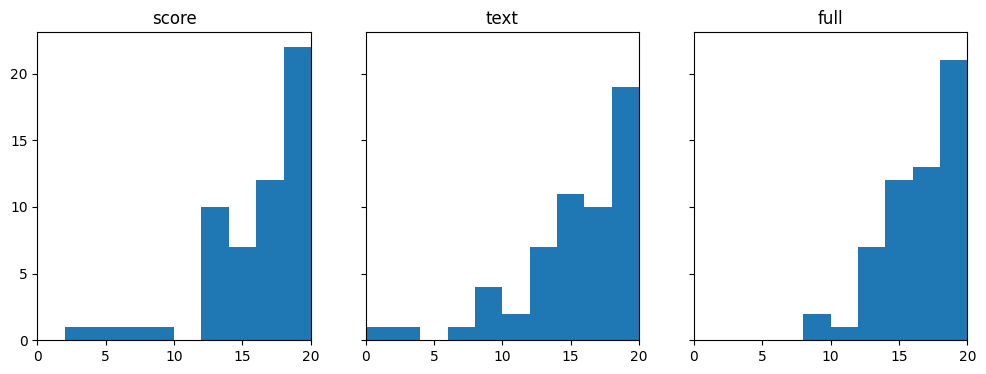

In [64]:
fig, axs = plt.subplots(1,3, figsize=(12,4), sharey=True)

conditions = list(ids.keys())

# for each condition
for a in range(len(axs)):
    data = part_file[part_file['condition'] == conditions[a]]['n_landings']
    axs[a].hist(data,bins=10,range=(0,20))
    axs[a].set_title(f'{conditions[a]}')
    axs[a].set_xlim(0,20)

plt.show()

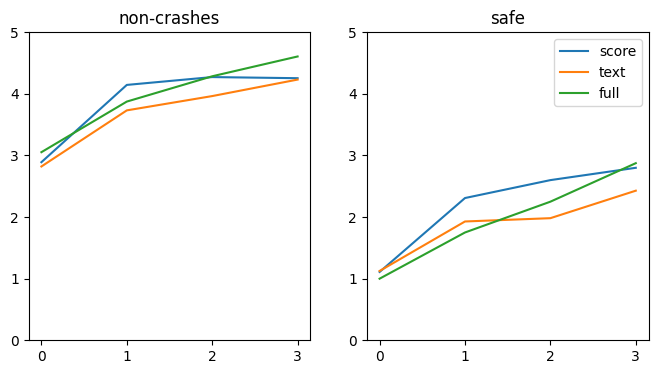

In [67]:
fig, axs = plt.subplots(1,2, figsize=(8,4))

conditions = list(ids.keys())
quarters = [(1,5), (6,10), (11,15), (16,20)]

for c in conditions:
    points = []
    errs = []
    for first, last in quarters:
        data = trial_file.loc[(trial_file['condition'] == c) & (trial_file['trial'] >= first) & (trial_file['trial'] <= last)]
        data['landed'] = data['outcome'].isin(['Safe', 'Unsafe'])
        data['successful'] = data['outcome'] == 'Safe'
        avg_land = data.groupby('prolific_id')['landed'].sum().mean()
        land_err = data.groupby('prolific_id')['landed'].sum().std()
        avg_success = data.groupby('prolific_id')['successful'].sum().mean()
        success_err = data.groupby('prolific_id')['successful'].sum().std()
        points.append((avg_land, avg_success))
        errs.append((land_err, success_err))
    for a in range(len(axs)):
        x = list(range(len(quarters)))
        # axs[a].errorbar(x, [pt[a] for pt in points], [er[a] for er in errs], label=c)
        axs[a].plot(x, [pt[a] for pt in points], label=c)
        axs[a].set_ylim(0,5)
        axs[a].set_title(['non-crashes', 'safe'][a])

plt.legend()
plt.show()

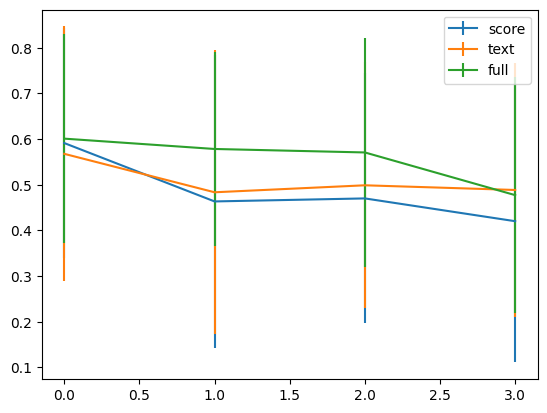

In [204]:
fig, ax = plt.subplots(1,1)
trial_file['outcome_int'] = trial_file['outcome_code'].astype(int)

conditions = list(ids.keys())
quarters = [(1,5), (6,10), (11,15), (16,20)]

for c in conditions:
    points = []
    errs = []
    for first, last in quarters:
        data = trial_file.loc[(trial_file['condition'] == c) & (trial_file['trial'] >= first) & (trial_file['trial'] <= last)]
        avg_var = data.groupby('prolific_id')['outcome_int'].std().mean()
        var_err = data.groupby('prolific_id')['outcome_int'].std().std()
        points.append(avg_var)
        errs.append(var_err)
    x = list(range(len(quarters)))
    ax.errorbar(x, points, errs, label=c)
    # ax.plot(x, points, label=c)
    # ax.set_ylim(0,5)

plt.legend()
plt.show()

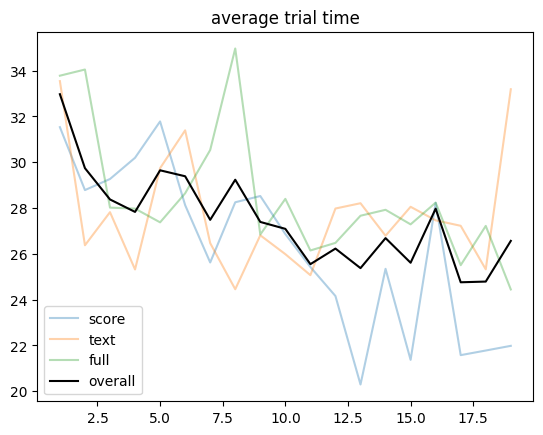

In [69]:
conditions = list(ids.keys())
n_trials = 20

for c in conditions:
    points = []
    errs = []
    for t in range(n_trials):
        data = trial_file.loc[(trial_file['condition'] == c) &  (trial_file['trial'] == t)]
        avg_time = data['trial_time_seconds'].mean()
        time_err = data['trial_time_seconds'].std()
        points.append(avg_time)
        errs.append(time_err)
    x = list(range(n_trials))
    # plt.errorbar(x, points, errs, label=c)
    plt.plot(x, points, alpha=0.35, label=c)

points_all = []
for t in range(n_trials):
        data = trial_file.loc[(trial_file['trial'] == t)]
        avg_time = data['trial_time_seconds'].mean()
        # time_err = data['trial_time_seconds'].std()
        points_all.append(avg_time)
        # errs.append(time_err)
plt.plot(points_all, 'k', label='overall')


plt.title('average trial time')
plt.legend()
plt.show()

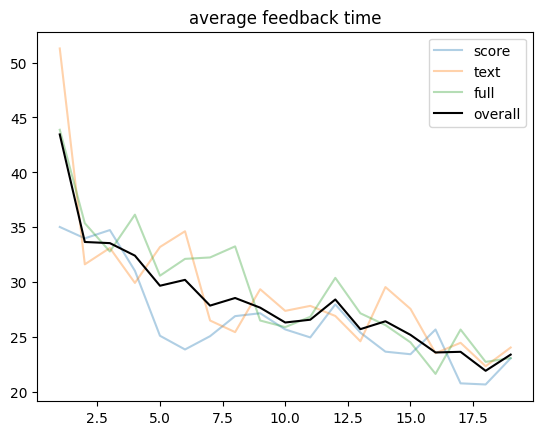

In [70]:
conditions = list(ids.keys())
n_trials = 20

for c in conditions:
    points = []
    errs = []
    for t in range(n_trials):
        data = trial_file.loc[(trial_file['condition'] == c) &  (trial_file['trial'] == t)]
        avg_time = data['feedback_time_seconds'].mean()
        time_err = data['feedback_time_seconds'].std()
        points.append(avg_time)
        errs.append(time_err)
    x = list(range(n_trials))
    # plt.errorbar(x, points, errs, label=c)
    plt.plot(x, points, alpha=0.35, label=c)

points_all = []
for t in range(n_trials):
        data = trial_file.loc[(trial_file['trial'] == t)]
        avg_time = data['feedback_time_seconds'].mean()
        # time_err = data['trial_time_seconds'].std()
        points_all.append(avg_time)
        # errs.append(time_err)
plt.plot(points_all, 'k', label='overall')


plt.title('average feedback time')
plt.legend()
plt.show()

In [205]:
utils.run_anova('avg_trial_time_seconds', part_file)

F_onewayResult(statistic=1.024648911669257, pvalue=0.36120851437815293)


In [206]:
utils.run_anova('avg_feedback_time_seconds', part_file)

F_onewayResult(statistic=1.0869473546713804, pvalue=0.33966127814481895)


In [207]:
part_file['got_10_landings'] = part_file['n_landings'] >= 10
part_file.groupby('condition')['got_10_landings'].mean()

condition
demo          NaN
full     0.964286
score    0.927273
text     0.875000
Name: got_10_landings, dtype: float64

In [208]:
part_file['got_15_landings'] = part_file['n_landings'] >= 15
part_file.groupby('condition')['got_15_landings'].mean()

condition
demo          NaN
full     0.696429
score    0.672727
text     0.625000
Name: got_15_landings, dtype: float64

In [210]:
c_table = part_file.groupby('condition')['got_10_landings'].value_counts().unstack()

# Performing Fisher's Exact Test for each pair and applying Bonferroni correction
p_values = []
comparisons = [('full', 'score'), ('full', 'text'), ('score', 'text')]
for group1, group2 in comparisons:
    table = c_table.loc[[group1, group2], :]
    oddsratio, p_value = stats.fisher_exact(table)
    p_values.append(p_value)

# Adjust p-values for multiple comparisons (Bonferroni correction)
alpha = 0.05 / len(comparisons)
significant_results = [p < alpha for p in p_values]

# Output results
print(f"Adjusted alpha (Bonferroni): {alpha}")
print(f"P-values: {p_values}")
print(f"Significant results: {significant_results}")

Adjusted alpha (Bonferroni): 0.016666666666666666
P-values: [0.4379314579949066, 0.16171491735240345, 0.5273323184625129]
Significant results: [False, False, False]


In [ ]:
part_file.groupby('condition')['n_landings'].mean().round(2)

In [ ]:
part_file.groupby('condition')['n_safe_landings'].sum()

In [ ]:
part_file.groupby('condition')['n_unsafe_landings'].sum()

In [ ]:
part_file.groupby('condition')['n_crashes'].sum()

In [211]:
part_file.groupby('condition')['n_landings'].agg(['sum', 'mean', 'std']).round(2)

,sum,mean,std
condition,,,
demo,0,NaN,NaN
full,909,16.23,2.90
score,868,15.78,3.79
text,842,15.04,4.27


In [212]:
utils.run_anova('n_landings', part_file)

F_onewayResult(statistic=1.4958970451274913, pvalue=0.22708833675543932)


In [94]:
part_file['any_safe_landings'] = part_file['n_safe_landings'] > 0
part_file['3_safe_landings'] = part_file['n_safe_landings'] >= 3

In [95]:
print(part_file.groupby('condition')['any_safe_landings'].value_counts().unstack())
print(part_file.groupby('condition')['3_safe_landings'].value_counts().unstack())

any_safe_landings  False  True 
condition                      
demo                   0      0
full                   2     54
score                  8     47
text                   7     49
3_safe_landings  False  True 
condition                    
demo                 0      0
full                 7     49
score               12     43
text                13     43


In [103]:
c_table = part_file[part_file['prolific_id'].isin(struggle_safe_ids)].groupby('condition')['any_safe_landings'].value_counts().unstack()

# Performing Fisher's Exact Test for each pair and applying Bonferroni correction
p_values = []
comparisons = [('full', 'score'), ('full', 'text'), ('score', 'text')]
for group1, group2 in comparisons:
    table = c_table.loc[[group1, group2], :]
    oddsratio, p_value = stats.fisher_exact(table)
    # res = stats.chi2_contingency(table)
    p_values.append(p_value)
    # p_values.append(res.pvalue)

# Adjust p-values for multiple comparisons (Bonferroni correction)
alpha = 0.05 / len(comparisons)
significant_results = [p < alpha for p in p_values]

# Output results
print(f"Adjusted alpha (Bonferroni): {alpha}")
print(f"P-values: {p_values}")
print(f"Significant results: {significant_results}")

Adjusted alpha (Bonferroni): 0.016666666666666666
P-values: [0.04029126704877053, 0.14295227524972248, 0.7680537861294822]
Significant results: [False, False, False]


In [100]:
c_table = part_file.groupby('condition')['3_safe_landings'].value_counts().unstack()

# Performing Fisher's Exact Test for each pair and applying Bonferroni correction
p_values = []
comparisons = [('full', 'score'), ('full', 'text'), ('score', 'text')]
for group1, group2 in comparisons:
    table = c_table.loc[[group1, group2], :]
    res = stats.chi2_contingency(table)
    p_values.append(res.pvalue)

# Adjust p-values for multiple comparisons (Bonferroni correction)
alpha = 0.05 / len(comparisons)
significant_results = [p < alpha for p in p_values]

# Output results
print(f"Adjusted alpha (Bonferroni): {alpha}")
print(f"P-values: {p_values}")
print(f"Significant results: {significant_results}")

Adjusted alpha (Bonferroni): 0.016666666666666666
P-values: [0.29318779388914956, 0.21735650056954303, 1.0]
Significant results: [False, False, False]


In [105]:
# calculate which trial they first achieved three successes in a row
part_file['three_in_a_row_idx'] = 0
n_trials = 20
for i in range(len(part_file)):
    part = part_file.iloc[i]
    data = pd.read_csv(data_dir + part['prolific_id'] + '/survey_responses.csv')
    for trial in range(n_trials-2):
        try:
            if (data['outcome'].iloc[trial] == 'Safe') & (data['outcome'].iloc[trial+1] == 'Safe') & (data['outcome'].iloc[trial+2] == 'Safe'):
                part_file.loc[part_file['prolific_id'] == part['prolific_id'], 'three_in_a_row_idx'] = trial + 1
                break
        except:
            print(f"skipping participant {part['prolific_id']} trial {trial}")

skipping participant 6522a86994a5ce0d7bb9feba trial 17


In [ ]:
part_file[['prolific_id', 'three_in_a_row_idx']].head(10)

In [106]:
part_file['five_in_a_row_idx'] = 0
n_trials = 20
for i in range(len(part_file)):
    part = part_file.iloc[i]
    data = pd.read_csv(data_dir + part['prolific_id'] + '/survey_responses.csv')
    for trial in range(n_trials-4):
        try:
            if (data['outcome'].iloc[trial] == 'Safe') & (data['outcome'].iloc[trial+1] == 'Safe') & (data['outcome'].iloc[trial+2] == 'Safe') & (data['outcome'].iloc[trial+3] == 'Safe') & (data['outcome'].iloc[trial+4] == 'Safe'):
                part_file.loc[part_file['prolific_id'] == part['prolific_id'], 'five_in_a_row_idx'] = trial + 1
                break
        except:
            print(f"skipping participant {part['prolific_id']} trial {trial}")

skipping participant 6522a86994a5ce0d7bb9feba trial 15


In [113]:
part_file['reached_mastery_3'] = part_file['three_in_a_row_idx'] > 0
part_file['reached_mastery_5'] = part_file['five_in_a_row_idx'] > 0

print(part_file[part_file['prolific_id'].isin(struggle_safe_ids)].groupby('condition')['reached_mastery_3'].value_counts().unstack())
print(part_file[part_file['prolific_id'].isin(struggle_safe_ids)].groupby('condition')['reached_mastery_5'].value_counts().unstack())

reached_mastery_3  False  True 
condition                      
demo                   0      0
full                  15     13
score                 16     11
text                  18     10
reached_mastery_5  False  True 
condition                      
demo                   0      0
full                  23      5
score                 20      7
text                  23      5


In [112]:
c_table = part_file[part_file['prolific_id'].isin(struggle_safe_ids)].groupby('condition')['reached_mastery_3'].value_counts().unstack()

# Performing Fisher's Exact Test for each pair and applying Bonferroni correction
p_values = []
comparisons = [('full', 'score'), ('full', 'text'), ('score', 'text')]
for group1, group2 in comparisons:
    table = c_table.loc[[group1, group2], :]
    res = stats.fisher_exact(table)
    p_values.append(res.pvalue)

# Adjust p-values for multiple comparisons (Bonferroni correction)
alpha = 0.05 / len(comparisons)
significant_results = [p < alpha for p in p_values]

# Output results
print(f"Adjusted alpha (Bonferroni): {alpha}")
print(f"P-values: {p_values}")
print(f"Significant results: {significant_results}")

Adjusted alpha (Bonferroni): 0.016666666666666666
P-values: [0.7874910585428516, 0.5874826430537712, 0.7847735528976195]
Significant results: [False, False, False]


In [109]:
c_table = part_file.groupby('condition')['reached_mastery_5'].value_counts().unstack()

# Performing Fisher's Exact Test for each pair and applying Bonferroni correction
p_values = []
comparisons = [('full', 'score'), ('full', 'text'), ('score', 'text')]
for group1, group2 in comparisons:
    table = c_table.loc[[group1, group2], :]
    res = stats.fisher_exact(table)
    p_values.append(res.pvalue)

# Adjust p-values for multiple comparisons (Bonferroni correction)
alpha = 0.05 / len(comparisons)
significant_results = [p < alpha for p in p_values]

# Output results
print(f"Adjusted alpha (Bonferroni): {alpha}")
print(f"P-values: {p_values}")
print(f"Significant results: {significant_results}")

Adjusted alpha (Bonferroni): 0.016666666666666666
P-values: [0.17851774356430208, 1.0, 0.1785177435643021]
Significant results: [False, False, False]


In [116]:
print(part_file[part_file['three_in_a_row_idx'] > 0].groupby('condition')['three_in_a_row_idx'].agg(['mean', 'std']))
print(part_file[part_file['five_in_a_row_idx'] > 0].groupby('condition')['five_in_a_row_idx'].agg(['mean', 'std']))

               mean       std
condition                    
demo            NaN       NaN
full       9.777778  4.733535
score      7.921053  4.738466
text       8.866667  5.679566
               mean       std
condition                    
demo            NaN       NaN
full       9.526316  4.776894
score      8.269231  3.650290
text       7.526316  4.439325


In [118]:
utils.run_kruskal('three_in_a_row_idx', part_file[(part_file['three_in_a_row_idx'] > 0) & (part_file['prolific_id'].isin(struggle_safe_ids))])

three_in_a_row_idx   6     7     8    9     10    11    12    13    14    15  \
condition                                                                      
full                0.0  0.00  0.00  0.0  0.08  0.31  0.08  0.08  0.23  0.08   
score               0.0  0.18  0.45  0.0  0.00  0.00  0.00  0.00  0.18  0.09   
text                0.1  0.00  0.20  0.1  0.00  0.00  0.10  0.00  0.00  0.20   

three_in_a_row_idx    17    18  
condition                       
full                0.08  0.08  
score               0.09  0.00  
text                0.10  0.20  
KruskalResult(statistic=3.7720232477570796, pvalue=0.15167554319089402)


In [120]:
utils.run_anova('three_in_a_row_idx', part_file[(part_file['three_in_a_row_idx'] > 0) & (part_file['prolific_id'].isin(struggle_safe_ids))])

F_onewayResult(statistic=1.919029355648576, pvalue=0.16378347458076276)


In [122]:
utils.run_kruskal('five_in_a_row_idx', part_file[(part_file['five_in_a_row_idx'] > 0) & (part_file['prolific_id'].isin(struggle_safe_ids))])

five_in_a_row_idx    8    9     11   12   13   14    15
condition                                              
full               0.00  0.0  0.20  0.2  0.0  0.4  0.20
score              0.71  0.0  0.14  0.0  0.0  0.0  0.14
text               0.20  0.2  0.00  0.2  0.2  0.0  0.20
KruskalResult(statistic=5.1266149870801, pvalue=0.07704947788600189)


In [125]:
part_file['achieved_mastery_3'] = part_file['three_in_a_row_idx'] > 0
c_table = part_file[part_file['prolific_id'].isin(struggle_safe_ids)].groupby('condition')['achieved_mastery_3'].value_counts().unstack()

# Performing Fisher's Exact Test for each pair and applying Bonferroni correction
p_values = []
comparisons = [('full', 'score'), ('full', 'text'), ('score', 'text')]
for group1, group2 in comparisons:
    table = c_table.loc[[group1, group2], :]
    res = stats.fisher_exact(table)
    p_values.append(res.pvalue)

# Adjust p-values for multiple comparisons (Bonferroni correction)
alpha = 0.05 / len(comparisons)
significant_results = [p < alpha for p in p_values]

# Output results
print(f"Adjusted alpha (Bonferroni): {alpha}")
print(f"P-values: {p_values}")
print(f"Significant results: {significant_results}")

Adjusted alpha (Bonferroni): 0.016666666666666666
P-values: [0.7874910585428516, 0.5874826430537712, 0.7847735528976195]
Significant results: [False, False, False]


In [127]:
part_file['achieved_mastery_5'] = part_file['five_in_a_row_idx'] > 0
c_table = part_file[part_file['prolific_id'].isin(struggle_safe_ids)].groupby('condition')['achieved_mastery_5'].value_counts().unstack()

# Performing Fisher's Exact Test for each pair and applying Bonferroni correction
p_values = []
comparisons = [('full', 'score'), ('full', 'text'), ('score', 'text')]
for group1, group2 in comparisons:
    table = c_table.loc[[group1, group2], :]
    res = stats.fisher_exact(table)
    p_values.append(res.pvalue)

# Adjust p-values for multiple comparisons (Bonferroni correction)
alpha = 0.05 / len(comparisons)
significant_results = [p < alpha for p in p_values]

# Output results
print(f"Adjusted alpha (Bonferroni): {alpha}")
print(f"P-values: {p_values}")
print(f"Significant results: {significant_results}")

Adjusted alpha (Bonferroni): 0.016666666666666666
P-values: [0.5279409234589058, 1.0, 0.5279409234589056]
Significant results: [False, False, False]


In [ ]:
# label each unsafe trial with which mistake they are making
trial_file['mistake'] = ''
for part in part_file['prolific_id']:
    data = pd.read_csv(data_dir + part + '/survey_responses.csv')
    for trial in data['trial']:
        if data.loc[data['trial'] == trial, 'outcome'].values[0] == 'Unsafe':
            # read in robusness file
            robustness = pd.read_csv(data_dir + part + f'/trial_{trial}/robustness.csv')
            reasons = ""
            if robustness.iloc[-1]['landing_speed'] < 0:
                reasons += "landing_speed "
            if robustness.iloc[-1]['landing_angle'] < 0:
                reasons += "landing_angle "
            elif (robustness.iloc[-1]['landing_angle'] > 0) & (robustness.iloc[-1]['landing_speed'] > 0):
                reasons += "something else "
            trial_file.loc[(trial_file['prolific_id'] == part) & (trial_file['trial'] == trial), 'mistake'] = reasons

In [ ]:
trial_file['mistake'].value_counts()

In [ ]:
trial_file.groupby(['condition', 'mistake'])['trial'].count().unstack().drop(columns=[''])

In [ ]:
trial_file.groupby(['condition', 'mistake'])['trial'].mean().unstack().drop(columns=['']).round(2)

In [ ]:
trial_file[trial_file['mistake'] == 'something else ']

From manual inspection, it looks like the "something else" instances are edge cases where the drone lands right on the edge of the landing pad. it is technically in bounds by my measures, but may have been counted as out of bounds by the javascript simulation. Should we leave as is?

In [ ]:
fig, axs = plt.subplots(1,3, figsize=(8,6))
n_trials = 20

conditions = list(ids.keys())

for a in range(len(axs)):
    for i in range(len(ids[conditions[a]])):
        part = ids[conditions[a]].iloc[i]
        for trial in range(n_trials):
            try:
                reason = trial_file[(trial_file['prolific_id'] == part) & (trial_file['trial'] == trial+1)]['mistake'].values[0]
                if 'speed' in reason and 'angle' not in reason:
                    axs[a].plot(trial, i, 'ro')
                elif 'angle' in reason and 'speed' not in reason:
                    axs[a].plot(trial, i, 'bo')
                elif 'angle' in reason and 'speed' in reason:
                    axs[a].plot(trial, i, 'ko')
            except:
                print(f"skipping participant {part} trial {trial}")

    axs[a].set_aspect('equal')
    axs[a].set_title(f'{conditions[a]}')

plt.show()

In [ ]:
part_file.groupby('condition')['land_last_5'].agg(['mean', 'std'])

### Are there different numbers of successful trials between conditions?

In [129]:
part_file[part_file['prolific_id'].isin(struggle_safe_ids)].groupby('condition')['n_crashes'].agg(['mean', 'std'])

,mean,std
condition,,
demo,NaN,NaN
full,5.821429,2.510033
score,6.592593,3.825615
text,7.821429,4.055664


In [131]:
utils.run_kruskal('n_safe_landings', part_file[part_file['prolific_id'].isin(struggle_safe_ids)])

n_safe_landings    0     1     2     3     4     5     6     7     8     9   \
condition                                                                     
full             0.07  0.07  0.11  0.14  0.04  0.11  0.11  0.14  0.11  0.04   
score            0.30  0.07  0.07  0.07  0.07  0.04  0.04  0.07  0.04  0.00   
text             0.25  0.11  0.11  0.04  0.04  0.07  0.11  0.07  0.04  0.07   

n_safe_landings    10    11    12    13  
condition                                
full             0.00  0.07  0.00  0.00  
score            0.04  0.04  0.04  0.11  
text             0.00  0.04  0.04  0.04  
KruskalResult(statistic=1.330498930512734, pvalue=0.5141452503302397)


In [133]:
utils.run_anova('n_safe_landings', part_file[part_file['prolific_id'].isin(struggle_safe_ids)])

F_onewayResult(statistic=0.22366151254240285, pvalue=0.8000840231786424)


In [135]:
utils.run_kruskal('n_unsafe_landings', part_file[part_file['prolific_id'].isin(struggle_safe_ids)])

n_unsafe_landings    1     2     3     4     5     6     7     8     9     10  \
condition                                                                       
full               0.00  0.00  0.00  0.07  0.04  0.14  0.00  0.25  0.04  0.11   
score              0.00  0.04  0.07  0.11  0.00  0.04  0.11  0.07  0.07  0.04   
text               0.04  0.04  0.07  0.04  0.04  0.07  0.11  0.21  0.07  0.04   

n_unsafe_landings    11    12    13    14    16  
condition                                        
full               0.14  0.07  0.04  0.07  0.04  
score              0.15  0.11  0.15  0.04  0.00  
text               0.14  0.11  0.04  0.00  0.00  
KruskalResult(statistic=1.864218439263347, pvalue=0.3937223869699551)


In [137]:
utils.run_anova('n_unsafe_landings', part_file[part_file['prolific_id'].isin(struggle_safe_ids)])

F_onewayResult(statistic=1.1460419059642084, pvalue=0.3230554636864928)


In [139]:
utils.run_kruskal('n_crashes', part_file[part_file['prolific_id'].isin(struggle_safe_ids)])

n_crashes    1     2     3     4     5     6     7     8     9     10    11  \
condition                                                                     
full       0.04  0.07  0.11  0.04  0.14  0.25  0.18  0.07  0.00  0.04  0.07   
score      0.04  0.00  0.19  0.07  0.11  0.15  0.22  0.07  0.00  0.00  0.04   
text       0.00  0.00  0.11  0.07  0.14  0.14  0.14  0.07  0.04  0.04  0.07   

n_crashes    12    13    16    17    19  
condition                                
full       0.00  0.00  0.00  0.00  0.00  
score      0.00  0.04  0.04  0.04  0.00  
text       0.07  0.04  0.00  0.04  0.04  
KruskalResult(statistic=3.0696214295121806, pvalue=0.215496477612811)


In [141]:
utils.run_anova('n_crashes', part_file[part_file['prolific_id'].isin(struggle_safe_ids)])

F_onewayResult(statistic=2.2902207512528467, pvalue=0.10784538565910622)


### Differences in outcomes in first/last half of the experiment?

In [142]:
utils.run_ttest_quantiles('Crash', [0.5, 0.5], part_file, trial_file)

TtestResult(statistic=7.208956908117774, pvalue=3.829327147266577e-12, df=332.0)


In [143]:
utils.run_ttest_quantiles('Unsafe', [0.5, 0.5], part_file, trial_file)

TtestResult(statistic=0.9108621490413038, pvalue=0.3630288585959077, df=332.0)


In [144]:
utils.run_ttest_quantiles('Safe', [0.5, 0.5], part_file, trial_file)

TtestResult(statistic=-6.053502225290444, pvalue=3.830216443483691e-09, df=332.0)


In [145]:
utils.run_ttest_quantiles('Crash', [0.5, 0.5], part_file, trial_file, idx=ids['score'])

TtestResult(statistic=3.745662096886137, pvalue=0.00029055260441882686, df=108.0)


In [146]:
utils.run_ttest_quantiles('Unsafe', [0.5, 0.5], part_file, trial_file, idx=ids['score'])

TtestResult(statistic=1.212200021191791, pvalue=0.22808103596205506, df=108.0)


In [147]:
utils.run_ttest_quantiles('Safe', [0.5, 0.5], part_file, trial_file, idx=ids['score'])

TtestResult(statistic=-3.380789412013998, pvalue=0.0010069648581391116, df=108.0)


In [148]:
utils.run_ttest_quantiles('Crash', [0.5, 0.5], part_file, trial_file, idx=ids['text'])

TtestResult(statistic=3.4421535843007476, pvalue=0.0008170374093530136, df=110.0)


In [149]:
utils.run_ttest_quantiles('Unsafe', [0.5, 0.5], part_file, trial_file, idx=ids['text'])

TtestResult(statistic=-0.7167416705480839, pvalue=0.4750525752938308, df=110.0)


In [150]:
utils.run_ttest_quantiles('Safe', [0.5, 0.5], part_file, trial_file, idx=ids['text'])

TtestResult(statistic=-2.3813083369430736, pvalue=0.01896942686329226, df=110.0)


In [151]:
utils.run_ttest_quantiles('Crash', [0.5, 0.5], part_file, trial_file, idx=ids['full'])

TtestResult(statistic=5.727578685022427, pvalue=8.977972634551725e-08, df=110.0)


In [152]:
utils.run_ttest_quantiles('Unsafe', [0.5, 0.5], part_file, trial_file, idx=ids['full'])

TtestResult(statistic=1.1720778416057256, pvalue=0.24369807289744258, df=110.0)


In [153]:
utils.run_ttest_quantiles('Safe', [0.5, 0.5], part_file, trial_file, idx=ids['full'])

TtestResult(statistic=-5.052252223043949, pvalue=1.7494428392195221e-06, df=110.0)


In [169]:
trialsh1 = trial_file[trial_file['trial'] <= 10]
outcomesh1 = pd.merge(trialsh1.groupby('prolific_id')['outcome'].value_counts().unstack(), part_file[['prolific_id', 'condition']], left_index=True, right_on='prolific_id')

trialsh2 = trial_file[trial_file['trial'] > 10]
outcomesh2 = pd.merge(trialsh2.groupby('prolific_id')['outcome'].value_counts().unstack(), part_file[['prolific_id', 'condition']], left_index=True, right_on='prolific_id')

outcomesh2['safe_diffs'] = outcomesh2['Safe'] - outcomesh1['Safe']
outcomesh2['unsafe_diffs'] = outcomesh2['Unsafe'] - outcomesh1['Unsafe']
outcomesh2['crash_diffs'] = outcomesh2['Crash'] - outcomesh1['Crash']

outcomes_struggle = outcomesh2[outcomesh2['prolific_id'].isin(struggle_safe_ids)]

In [216]:
outcomesh2.groupby('condition')['safe_diffs'].agg(['mean', 'std'])

,mean,std
condition,,
demo,NaN,NaN
full,2.375000,2.332088
score,1.981818,2.181495
text,1.357143,2.652125


In [218]:
stats.ttest_ind(outcomesh2[outcomesh2['condition'] == 'full']['safe_diffs'],
                outcomesh2[outcomesh2['condition'] == 'text']['safe_diffs'])

TtestResult(statistic=2.1567796723939736, pvalue=0.03319992159363631, df=110.0)

In [155]:
stats.f_oneway(outcomesh2[outcomesh2['condition'] == 'score']['safe_diffs'],
              outcomesh2[outcomesh2['condition'] == 'text']['safe_diffs'],
              outcomesh2[outcomesh2['condition'] == 'full']['safe_diffs'])

F_onewayResult(statistic=2.5655854263372446, pvalue=0.07995687240086118)

In [214]:
stats.ttest_ind(outcomesh2[outcomesh2['condition'] == 'text']['safe_diffs'],
                outcomesh2[outcomesh2['condition'] == 'score']['safe_diffs'])

TtestResult(statistic=-1.3539194963187393, pvalue=0.17856261670454238, df=109.0)

In [156]:
stats.kruskal(outcomesh2[outcomesh2['condition'] == 'score']['safe_diffs'],
              outcomesh2[outcomesh2['condition'] == 'text']['safe_diffs'],
              outcomesh2[outcomesh2['condition'] == 'full']['safe_diffs'])

KruskalResult(statistic=4.690758582010283, pvalue=0.09581085504236013)

In [161]:
stats.f_oneway(outcomesh2[outcomesh2['condition'] == 'score']['unsafe_diffs'],
              outcomesh2[outcomesh2['condition'] == 'text']['unsafe_diffs'],
              outcomesh2[outcomesh2['condition'] == 'full']['unsafe_diffs'])

F_onewayResult(statistic=2.211023225151518, pvalue=0.11284503519291417)

In [162]:
stats.kruskal(outcomesh2[outcomesh2['condition'] == 'score']['unsafe_diffs'],
              outcomesh2[outcomesh2['condition'] == 'text']['unsafe_diffs'],
              outcomesh2[outcomesh2['condition'] == 'full']['unsafe_diffs'])

KruskalResult(statistic=5.086178213878921, pvalue=0.07862314895515005)

In [176]:
outcomes_struggle.groupby('condition')['unsafe_diffs'].agg(['mean', 'std'])

,mean,std
condition,,
demo,NaN,NaN
full,-0.250000,2.443813
score,-0.222222,2.708013
text,0.142857,2.429972


In [178]:
stats.ttest_ind(outcomes_struggle[outcomes_struggle['condition'] == 'text']['unsafe_diffs'],
                outcomes_struggle[outcomes_struggle['condition'] == 'full']['unsafe_diffs'])

TtestResult(statistic=0.603198956361467, pvalue=0.5489016193433884, df=54.0)

In [ ]:
sp.posthoc_dunn(outcomesh2, val_col='unsafe_diffs', group_col='condition', p_adjust='bonferroni')

In [166]:
stats.f_oneway(outcomesh2[outcomesh2['condition'] == 'score']['crash_diffs'],
              outcomesh2[outcomesh2['condition'] == 'text']['crash_diffs'],
              outcomesh2[outcomesh2['condition'] == 'full']['crash_diffs'])

F_onewayResult(statistic=0.7167261873661696, pvalue=0.4898715695100194)

In [167]:
stats.kruskal(outcomesh2[outcomesh2['condition'] == 'score']['crash_diffs'],
              outcomesh2[outcomesh2['condition'] == 'text']['crash_diffs'],
              outcomesh2[outcomesh2['condition'] == 'full']['crash_diffs'])

KruskalResult(statistic=1.034322618515905, pvalue=0.5962106055862317)

In [179]:
outcomes_struggle.groupby('condition')[['crash_diffs','unsafe_diffs','safe_diffs']].mean().round(2)

,crash_diffs,unsafe_diffs,safe_diffs
condition,,,
demo,NaN,NaN,NaN
full,-3.04,-0.25,3.32
score,-2.07,-0.22,2.30
text,-2.32,0.14,2.36


### What about first and last quarter?

In [180]:
utils.run_ttest_quantiles('Crash', [0.25, 0.75], part_file, trial_file)

TtestResult(statistic=10.028846230962033, pvalue=7.514513119341363e-21, df=332.0)


In [181]:
utils.run_ttest_quantiles('Unsafe', [0.25, 0.75], part_file, trial_file)

TtestResult(statistic=1.3495827913746654, pvalue=0.17806937138725573, df=332.0)


In [182]:
utils.run_ttest_quantiles('Safe', [0.25, 0.75], part_file, trial_file)

TtestResult(statistic=-9.885521305751617, pvalue=2.2795711295876254e-20, df=332.0)


In [183]:
utils.run_ttest_quantiles('Crash', [0.25, 0.75], part_file, trial_file, idx=ids['score'])

TtestResult(statistic=5.007953872596047, pvalue=2.157075261832122e-06, df=108.0)


In [184]:
utils.run_ttest_quantiles('Unsafe', [0.25, 0.75], part_file, trial_file, idx=ids['score'])

TtestResult(statistic=1.3559452945699282, pvalue=0.17794495007976247, df=108.0)


In [185]:
utils.run_ttest_quantiles('Safe', [0.25, 0.75], part_file, trial_file, idx=ids['score'])

TtestResult(statistic=-5.486077705313302, pvalue=2.7339917994325286e-07, df=108.0)


In [186]:
utils.run_ttest_quantiles('Crash', [0.25, 0.75], part_file, trial_file, idx=ids['text'])

TtestResult(statistic=5.453735897164996, pvalue=3.0640831731314436e-07, df=110.0)


In [187]:
utils.run_ttest_quantiles('Unsafe', [0.25, 0.75], part_file, trial_file, idx=ids['text'])

TtestResult(statistic=-0.44734917640211813, pvalue=0.6555026253337277, df=110.0)


In [188]:
utils.run_ttest_quantiles('Safe', [0.25, 0.75], part_file, trial_file, idx=ids['text'])

TtestResult(statistic=-4.453899981173935, pvalue=2.0346689222092292e-05, df=110.0)


In [189]:
utils.run_ttest_quantiles('Crash', [0.25, 0.75], part_file, trial_file, idx=ids['full'])

TtestResult(statistic=7.1885394807877505, pvalue=8.341835390112227e-11, df=110.0)


In [190]:
utils.run_ttest_quantiles('Unsafe', [0.25, 0.75], part_file, trial_file, idx=ids['full'])

TtestResult(statistic=1.54204485079309, pvalue=0.12593466190182978, df=110.0)


In [191]:
utils.run_ttest_quantiles('Safe', [0.25, 0.75], part_file, trial_file, idx=ids['full'])

TtestResult(statistic=-7.4685431748029485, pvalue=2.050681554603695e-11, df=110.0)


In [192]:
trialsq1 = trial_file[trial_file['trial'] <= 5]
outcomesq1 = pd.merge(trialsq1.groupby('prolific_id')['outcome'].value_counts().unstack(), part_file[['prolific_id', 'condition']], left_index=True, right_on='prolific_id')

trialsq4 = trial_file[trial_file['trial'] > 15]
outcomesq4 = pd.merge(trialsq4.groupby('prolific_id')['outcome'].value_counts().unstack(), part_file[['prolific_id', 'condition']], left_index=True, right_on='prolific_id')

outcomesq4['safe_diffs'] = outcomesq4['Safe'] - outcomesq1['Safe']
outcomesq4['unsafe_diffs'] = outcomesq4['Unsafe'] - outcomesq1['Unsafe']
outcomesq4['crash_diffs'] = outcomesq4['Crash'] - outcomesq1['Crash']

outcomes_struggle = outcomesq4[outcomesq4['prolific_id'].isin(struggle_safe_ids)]

In [193]:
stats.f_oneway(outcomesq4[outcomesq4['condition'] == 'score']['safe_diffs'],
              outcomesq4[outcomesq4['condition'] == 'text']['safe_diffs'],
              outcomesq4[outcomesq4['condition'] == 'full']['safe_diffs'])

F_onewayResult(statistic=1.7521515209539669, pvalue=0.17663068372149035)

In [194]:
stats.kruskal(outcomesq4[outcomesq4['condition'] == 'score']['safe_diffs'],
              outcomesq4[outcomesq4['condition'] == 'text']['safe_diffs'],
              outcomesq4[outcomesq4['condition'] == 'full']['safe_diffs'])

KruskalResult(statistic=3.1765243172166504, pvalue=0.20428031021869325)

In [195]:
stats.f_oneway(outcomesq4[outcomesq4['condition'] == 'score']['unsafe_diffs'],
              outcomesq4[outcomesq4['condition'] == 'text']['unsafe_diffs'],
              outcomesq4[outcomesq4['condition'] == 'full']['unsafe_diffs'])

F_onewayResult(statistic=1.280834316544031, pvalue=0.28056944564581704)

In [196]:
stats.kruskal(outcomesq4[outcomesq4['condition'] == 'score']['unsafe_diffs'],
              outcomesq4[outcomesq4['condition'] == 'text']['unsafe_diffs'],
              outcomesq4[outcomesq4['condition'] == 'full']['unsafe_diffs'])

KruskalResult(statistic=2.8428054004678187, pvalue=0.24137520227222597)

In [197]:
stats.f_oneway(outcomesq4[outcomesq4['condition'] == 'score']['crash_diffs'],
              outcomesq4[outcomesq4['condition'] == 'text']['crash_diffs'],
              outcomesq4[outcomesq4['condition'] == 'full']['crash_diffs'])

F_onewayResult(statistic=0.3089001087055771, pvalue=0.7346803730763186)

In [198]:
stats.kruskal(outcomesq4[outcomesq4['condition'] == 'score']['crash_diffs'],
              outcomesq4[outcomesq4['condition'] == 'text']['crash_diffs'],
              outcomesq4[outcomesq4['condition'] == 'full']['crash_diffs'])

KruskalResult(statistic=0.3556346759251577, pvalue=0.8370953150603646)

In [199]:
outcomesq4.groupby('condition')[['crash_diffs','unsafe_diffs','safe_diffs']].mean()

,crash_diffs,unsafe_diffs,safe_diffs
condition,,,
demo,NaN,NaN,NaN
full,-1.500000,-0.321429,1.875000
score,-1.290909,-0.327273,1.690909
text,-1.321429,0.107143,1.303571


### Look at robustness and efficiency

In [ ]:
# what are max and min values for the robustness and efficiency measures?
robustness_cols = ['left_boundary',	'right_boundary', 'top_boundary', 'bottom_boundary', 'landing_left', 'landing_right', 'landing_speed','landing_angle']
robustness_files = glob.glob(f'{data_dir}*/*/robustness.csv')
robustness_vals = {v : {'max':-99999, 'min':99999} for v in robustness_cols}

In [ ]:
for f in robustness_files:
    df = pd.read_csv(f)
    for col in robustness_cols:
        if df[col].min() < robustness_vals[col]['min']:
            robustness_vals[col]['min'] = min(df[col])
        if df[col].max() > robustness_vals[col]['max']:
            robustness_vals[col]['max'] = max(df[col])

robustness_vals

In [ ]:
fig, axs = plt.subplots(1,4, figsize=(10,6))
n_trials = 20
var = 'landing_speed'

cmap = mpl.cm.seismic
norm = mpl.colors.Normalize(vmin=robustness_vals[var]['max'], vmax=robustness_vals[var]['min'])

conditions = list(ids.keys())

for a in range(len(axs)-1):
    for i in range(len(ids[conditions[a]])):
        part = ids[conditions[a]].iloc[i]
        data = pd.read_csv(data_dir + part + '/survey_responses.csv')
        for trial in range(n_trials):
            try:
                outcome = data[data['trial'] == trial+1]['outcome'].values[0]
                if outcome in ['Safe', 'Unsafe']:
                    trial_data = pd.read_csv(f"{data_dir}{part}/trial_{trial+1}/robustness.csv")
                    val = trial_data.iloc[-1][var]
                    val_normed = (val - robustness_vals[var]['min'])/(robustness_vals[var]['max'] - robustness_vals[var]['min'])
                    c = cmap(val_normed)
                    axs[a].plot(trial, i, marker='o', color=c)
            except:
                print(f"skipping participant {part} trial {trial}")

    axs[a].set_aspect('equal')
    axs[a].set_title(f'{conditions[a]}')

fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap), orientation='vertical', label='robustness',cax=axs[-1])
plt.show()

In [ ]:
fig, axs = plt.subplots(1,4, figsize=(10,6))
n_trials = 20
var = 'landing_angle'

cmap = mpl.cm.seismic
norm = mpl.colors.Normalize(vmin=robustness_vals[var]['min'], vmax=robustness_vals[var]['max'])

conditions = list(ids.keys())

for a in range(len(axs)-1):
    for i in range(len(ids[conditions[a]])):
        part = ids[conditions[a]].iloc[i]
        data = pd.read_csv(data_dir + part + '/survey_responses.csv')
        for trial in range(n_trials):
            try:
                outcome = data[data['trial'] == trial+1]['outcome'].values[0]
                if outcome in ['Safe', 'Unsafe']:
                    trial_data = pd.read_csv(f"{data_dir}{part}/trial_{trial+1}/robustness.csv")
                    val = trial_data.iloc[-1][var]
                    val_normed = (val - robustness_vals[var]['min'])/(robustness_vals[var]['max'] - robustness_vals[var]['min'])
                    c = cmap(val_normed)
                    axs[a].plot(trial, i, marker='o', color=c)
            except:
                print(f"skipping participant {part} trial {trial}")

    axs[a].set_aspect('equal')
    axs[a].set_title(f'{conditions[a]}')

fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap), orientation='vertical', label='robustness',cax=axs[-1])
plt.show()

# Stuff ChatGPT suggested

In [71]:
# Merge dataframes on prolific_id
data = pd.merge(trial_file, part_file, on='prolific_id')
data_struggle = data[data['prolific_id'].isin(struggle_safe_ids)]

Proportion safe landings

In [26]:
# Proportion of Safe Landings
data['safe_landing'] = data['outcome_code'].apply(lambda x: 1 if x == 2 else 0)
proportion_safe = data.groupby('prolific_id')['safe_landing'].mean().reset_index()
proportion_safe = pd.merge(proportion_safe, part_file[['prolific_id', 'condition']], on='prolific_id')
proportion_safe

,prolific_id,safe_landing,condition
0,569b36e3af9ad70006640dd9,0.400000,score
1,56bae08f30d6b30005f8537a,0.850000,full
2,5760a995f371330006a47cb3,0.312500,full
3,5834a80a106ee1000120abd3,0.250000,text
4,587674406e2f8d00015c6148,0.800000,score
...,...,...,...
162,65a8e09cb517c52021059686,0.650000,score
163,65c10c2abe42175a96e3ef2f,0.000000,full
164,65c1779a3f438c1cdcd9641a,0.000000,text
165,65cefb1a4565306b90516a56,0.210526,text


In [27]:
proportion_safe.groupby('condition')['safe_landing'].agg(['mean', 'std'])
# not going to bother with anova, these are very similar

,mean,std
condition,,
demo,NaN,NaN
full,0.402268,0.220739
score,0.448923,0.292863
text,0.381720,0.276648


In [73]:
# Proportion of Safe Landings
data_struggle['safe_landing'] = data['outcome_code'].apply(lambda x: 1 if x == 2 else 0)
proportion_safe = data_struggle.groupby('prolific_id')['safe_landing'].mean().reset_index()
proportion_safe = pd.merge(proportion_safe, part_file[['prolific_id', 'condition']], on='prolific_id')
proportion_safe

,prolific_id,safe_landing,condition
0,5760a995f371330006a47cb3,0.3125,full
1,5834a80a106ee1000120abd3,0.2500,text
2,58cb138127e23a0001b4fb5d,0.4500,full
3,5904dd5b352dd30001fb5e43,0.3500,full
4,590eb4006d77630001d3a28a,0.0000,score
...,...,...,...
78,659f1e6392a74cfe36923af7,0.0500,text
79,65a03d9edc0d74b929e38a76,0.0500,score
80,65c10c2abe42175a96e3ef2f,0.0000,full
81,65c1779a3f438c1cdcd9641a,0.0000,text


In [75]:
proportion_safe.groupby('condition')['safe_landing'].agg(['mean', 'std'])

,mean,std
condition,,
demo,NaN,NaN
full,0.248566,0.152054
score,0.232749,0.235581
text,0.214818,0.205669


Time to first mastery

In [31]:
# Time to First Mastery
# look at code above


Consistency of performance

In [36]:
# Consistency of Performance
data['outcome_int'] = data['outcome_code'].astype(int)
consistency = data.groupby('prolific_id')['outcome_int'].std().reset_index()
consistency = pd.merge(consistency, part_file[['prolific_id', 'condition']], on='prolific_id')
consistency

,prolific_id,outcome_int,condition
0,569b36e3af9ad70006640dd9,0.917663,score
1,56bae08f30d6b30005f8537a,0.523148,full
2,5760a995f371330006a47cb3,0.771902,full
3,5834a80a106ee1000120abd3,0.812728,text
4,587674406e2f8d00015c6148,0.550120,score
...,...,...,...
162,65a8e09cb517c52021059686,0.686333,score
163,65c10c2abe42175a96e3ef2f,0.512989,full
164,65c1779a3f438c1cdcd9641a,0.383482,text
165,65cefb1a4565306b90516a56,0.764719,text


In [38]:
consistency.groupby('condition')['outcome_int'].agg(['mean', 'std'])
# these are very similar as well

,mean,std
condition,,
demo,NaN,NaN
full,0.665943,0.123133
score,0.628818,0.142138
text,0.632115,0.162630


In [77]:
data_struggle['outcome_int'] = data['outcome_code'].astype(int)
consistency = data_struggle.groupby('prolific_id')['outcome_int'].std().reset_index()
consistency = pd.merge(consistency, part_file[['prolific_id', 'condition']], on='prolific_id')
consistency

,prolific_id,outcome_int,condition
0,5760a995f371330006a47cb3,0.771902,full
1,5834a80a106ee1000120abd3,0.812728,text
2,58cb138127e23a0001b4fb5d,0.875094,full
3,5904dd5b352dd30001fb5e43,0.788069,full
4,590eb4006d77630001d3a28a,0.502625,score
...,...,...,...
78,659f1e6392a74cfe36923af7,0.606977,text
79,65a03d9edc0d74b929e38a76,0.571241,score
80,65c10c2abe42175a96e3ef2f,0.512989,full
81,65c1779a3f438c1cdcd9641a,0.383482,text


In [78]:
consistency.groupby('condition')['outcome_int'].agg(['mean', 'std'])

,mean,std
condition,,
demo,NaN,NaN
full,0.709791,0.130359
score,0.640337,0.142042
text,0.657436,0.167624


In [79]:
stats.f_oneway(
    consistency[consistency['condition'] == 'full']['outcome_int'],
    consistency[consistency['condition'] == 'text']['outcome_int'],
    consistency[consistency['condition'] == 'score']['outcome_int']
)

F_onewayResult(statistic=1.664534708288707, pvalue=0.1957664232735365)

Improvement over time

In [41]:
# Improvement Over Time
def improvement_trend(df):
    df = df.reset_index()
    df['attempt'] = df.index + 1
    trend = np.polyfit(df['attempt'], df['outcome_int'], 1)[0]
    return trend

improvement = data.groupby('prolific_id').apply(improvement_trend).reset_index()
improvement = pd.merge(improvement, part_file[['prolific_id', 'condition']], on='prolific_id')
improvement.columns = ['prolific_id', 'trend', 'condition']
improvement

,prolific_id,trend,condition
0,569b36e3af9ad70006640dd9,0.063158,score
1,56bae08f30d6b30005f8537a,0.033083,full
2,5760a995f371330006a47cb3,0.101471,full
3,5834a80a106ee1000120abd3,0.087970,text
4,587674406e2f8d00015c6148,0.023308,score
...,...,...,...
162,65a8e09cb517c52021059686,0.048872,score
163,65c10c2abe42175a96e3ef2f,0.052632,full
164,65c1779a3f438c1cdcd9641a,0.009288,text
165,65cefb1a4565306b90516a56,0.022807,text


In [42]:
improvement.groupby('condition')['trend'].agg(['mean', 'std'])

,mean,std
condition,,
demo,NaN,NaN
full,0.045588,0.035695
score,0.040267,0.033285
text,0.034291,0.040585


In [44]:
stats.f_oneway(
    improvement[improvement['condition'] == 'full']['trend'],
    improvement[improvement['condition'] == 'text']['trend'],
    improvement[improvement['condition'] == 'score']['trend']
)

F_onewayResult(statistic=1.3302530523158445, pvalue=0.26724798584243226)

In [80]:
# Improvement Over Time
def improvement_trend(df):
    df = df.reset_index()
    df['attempt'] = df.index + 1
    trend = np.polyfit(df['attempt'], df['outcome_int'], 1)[0]
    return trend

improvement = data_struggle.groupby('prolific_id').apply(improvement_trend).reset_index()
improvement = pd.merge(improvement, part_file[['prolific_id', 'condition']], on='prolific_id')
improvement.columns = ['prolific_id', 'trend', 'condition']
improvement

,prolific_id,trend,condition
0,5760a995f371330006a47cb3,1.014706e-01,full
1,5834a80a106ee1000120abd3,8.796992e-02,text
2,58cb138127e23a0001b4fb5d,1.165414e-01,full
3,5904dd5b352dd30001fb5e43,9.022556e-02,full
4,590eb4006d77630001d3a28a,2.728848e-17,score
...,...,...,...
78,659f1e6392a74cfe36923af7,7.518797e-03,text
79,65a03d9edc0d74b929e38a76,1.954887e-02,score
80,65c10c2abe42175a96e3ef2f,5.263158e-02,full
81,65c1779a3f438c1cdcd9641a,9.287926e-03,text


In [81]:
improvement.groupby('condition')['trend'].agg(['mean', 'std'])

,mean,std
condition,,
demo,NaN,NaN
full,0.063832,0.038161
score,0.048646,0.037370
text,0.052901,0.037327


In [82]:
stats.f_oneway(
    improvement[improvement['condition'] == 'full']['trend'],
    improvement[improvement['condition'] == 'text']['trend'],
    improvement[improvement['condition'] == 'score']['trend']
)

F_onewayResult(statistic=1.1989493603837234, pvalue=0.306869704070658)

In [83]:
stats.ttest_ind(improvement[improvement['condition'] == 'full']['trend'], improvement[improvement['condition'] == 'score']['trend'])

TtestResult(statistic=1.4905212750511792, pvalue=0.14201506102411185, df=53.0)

Last N landings

In [45]:
# Last N Landings
def last_n_safe(df, n=5):
    return df['safe_landing'].iloc[-n:].mean()

last_n_landings = data.groupby('prolific_id').apply(last_n_safe).reset_index()
last_n_landings = pd.merge(last_n_landings, part_file[['prolific_id', 'condition']], on='prolific_id')
last_n_landings.columns = ['prolific_id', 'last_n_safe', 'condition']
last_n_landings

,prolific_id,last_n_safe,condition
0,569b36e3af9ad70006640dd9,0.6,score
1,56bae08f30d6b30005f8537a,1.0,full
2,5760a995f371330006a47cb3,0.4,full
3,5834a80a106ee1000120abd3,0.8,text
4,587674406e2f8d00015c6148,1.0,score
...,...,...,...
162,65a8e09cb517c52021059686,1.0,score
163,65c10c2abe42175a96e3ef2f,0.0,full
164,65c1779a3f438c1cdcd9641a,0.0,text
165,65cefb1a4565306b90516a56,0.2,text


In [46]:
last_n_landings.groupby('condition')['last_n_safe'].agg(['mean','std'])
# no difference for n=1 or n=3 or n=10

,mean,std
condition,,
demo,NaN,NaN
full,0.578571,0.292148
score,0.560000,0.371982
text,0.500000,0.349545


In [90]:
# Last N Landings
def last_n_safe(df, n=3):
    return df['safe_landing'].iloc[-n:].mean()

last_n_landings = data_struggle.groupby('prolific_id').apply(last_n_safe).reset_index()
last_n_landings = pd.merge(last_n_landings, part_file[['prolific_id', 'condition']], on='prolific_id')
last_n_landings.columns = ['prolific_id', 'last_n_safe', 'condition']
last_n_landings

,prolific_id,last_n_safe,condition
0,5760a995f371330006a47cb3,0.666667,full
1,5834a80a106ee1000120abd3,1.000000,text
2,58cb138127e23a0001b4fb5d,1.000000,full
3,5904dd5b352dd30001fb5e43,0.666667,full
4,590eb4006d77630001d3a28a,0.000000,score
...,...,...,...
78,659f1e6392a74cfe36923af7,0.333333,text
79,65a03d9edc0d74b929e38a76,0.333333,score
80,65c10c2abe42175a96e3ef2f,0.000000,full
81,65c1779a3f438c1cdcd9641a,0.000000,text


In [91]:
last_n_landings.groupby('condition')['last_n_safe'].agg(['mean', 'std'])

,mean,std
condition,,
demo,NaN,NaN
full,0.476190,0.306696
score,0.320988,0.375323
text,0.452381,0.397671


Cumulative safe landings

In [50]:
# Cumulative Safe Landings
cumulative_safe = data.groupby('prolific_id')['safe_landing'].sum().reset_index()
cumulative_safe = pd.merge(cumulative_safe, part_file[['prolific_id', 'condition']], on='prolific_id')
cumulative_safe

,prolific_id,safe_landing,condition
0,569b36e3af9ad70006640dd9,8,score
1,56bae08f30d6b30005f8537a,17,full
2,5760a995f371330006a47cb3,5,full
3,5834a80a106ee1000120abd3,5,text
4,587674406e2f8d00015c6148,16,score
...,...,...,...
162,65a8e09cb517c52021059686,13,score
163,65c10c2abe42175a96e3ef2f,0,full
164,65c1779a3f438c1cdcd9641a,0,text
165,65cefb1a4565306b90516a56,4,text


In [51]:
cumulative_safe.groupby('condition')['safe_landing'].agg(['mean','std'])

,mean,std
condition,,
demo,NaN,NaN
full,7.875000,4.394470
score,8.818182,5.748078
text,7.464286,5.417025


In [92]:
# Cumulative Safe Landings
cumulative_safe = data_struggle.groupby('prolific_id')['safe_landing'].sum().reset_index()
cumulative_safe = pd.merge(cumulative_safe, part_file[['prolific_id', 'condition']], on='prolific_id')
cumulative_safe

,prolific_id,safe_landing,condition
0,5760a995f371330006a47cb3,5,full
1,5834a80a106ee1000120abd3,5,text
2,58cb138127e23a0001b4fb5d,9,full
3,5904dd5b352dd30001fb5e43,7,full
4,590eb4006d77630001d3a28a,0,score
...,...,...,...
78,659f1e6392a74cfe36923af7,1,text
79,65a03d9edc0d74b929e38a76,1,score
80,65c10c2abe42175a96e3ef2f,0,full
81,65c1779a3f438c1cdcd9641a,0,text


In [93]:
cumulative_safe.groupby('condition')['safe_landing'].agg(['mean', 'std'])

,mean,std
condition,,
demo,NaN,NaN
full,4.750000,2.849626
score,4.592593,4.667888
text,4.214286,4.049299


# Pulling out qualitative stuff

Grab all the images. This only needs to be done once.

In [ ]:
utils.copy_images(part_file['prolific_id'])